In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Restaurant_Reviews.tsv')   ## error will occur because it will not read the tab separated values directly

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 3


In [3]:
df=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')

In [4]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [47]:
# lower case
df['Review']=df['Review'].str.lower()

In [48]:
df.shape

(1000, 2)

In [7]:
## Removing punctuations

import string
string.punctuation
exclude=string.punctuation

In [8]:
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
def remove_punc(x):
    for i in exclude:
        x=x.replace(i,' ')
    return x

In [10]:
# example
remove_punc('hey!!,how are you???')


'hey   how are you   '

In [11]:
df['Review']=df['Review'].apply(remove_punc)

In [12]:
df.head()

,Review,Liked
0,Wow Loved this place,1
1,Crust is not good,0
2,Not tasty and the texture was just nasty,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [13]:
# Apply TF-IDF vectorizer on preprocessed data

from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
tf = TfidfVectorizer()
X=tf.fit_transform(df['Review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
x.shape

(1000, 2035)

In [17]:
Y=df['Liked']

In [18]:
Y.head()

0    1
1    0
2    0
3    1
4    1
Name: Liked, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)

In [23]:
xtrain.shape

(800, 2035)

In [24]:
## Build Neural network

from keras.models import Sequential
from keras.layers import Input,Dense,Dropout
from keras.callbacks import EarlyStopping

In [26]:
model= Sequential()

# Add an input layer
model.add(Input(shape=(xtrain.shape[1])))

# create dense layer 1
model.add(Dense(units=128 , activation='relu'))
# add dropout layers
model.add(Dropout(rate=0.5))

# add dense layer 2
model.add(Dense(units=64 , activation='relu'))
# add dropout layer 2
model.add(Dropout(rate=0.4))

# add output layer
model.add(Dense(units=1 , activation='sigmoid'))

In [27]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [28]:
es=EarlyStopping(monitor='val_loss',patience=15)

In [29]:
hist=model.fit(xtrain,ytrain,validation_split=0.1,epochs=200,callbacks=[es])

Epoch 1/200
23/23 [==============================] - 4s 14ms/step - loss: 0.6916 - accuracy: 0.5389 - val_loss: 0.6905 - val_accuracy: 0.5250
Epoch 2/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6793 - accuracy: 0.6722 - val_loss: 0.6793 - val_accuracy: 0.6875
Epoch 3/200
23/23 [==============================] - 0s 5ms/step - loss: 0.6419 - accuracy: 0.8125 - val_loss: 0.6444 - val_accuracy: 0.6875
Epoch 4/200
23/23 [==============================] - 0s 5ms/step - loss: 0.5493 - accuracy: 0.8736 - val_loss: 0.5625 - val_accuracy: 0.7500
Epoch 5/200
23/23 [==============================] - 0s 5ms/step - loss: 0.3746 - accuracy: 0.9403 - val_loss: 0.4699 - val_accuracy: 0.8000
Epoch 6/200
23/23 [==============================] - 0s 5ms/step - loss: 0.2068 - accuracy: 0.9681 - val_loss: 0.4539 - val_accuracy: 0.7125
Epoch 7/200
23/23 [==============================] - 0s 5ms/step - loss: 0.1148 - accuracy: 0.9806 - val_loss: 0.4382 - val_accuracy: 0.7250
Epoch 8/200


In [30]:
model.evaluate(xtrain,ytrain)

25/25 [==============================] - 0s 4ms/step - loss: 0.0694 - accuracy: 0.9750


[0.06935581564903259, 0.9750000238418579]

In [31]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.7950


[0.7045091986656189, 0.7950000166893005]

In [32]:
## Predictions

yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

7/7 [==============================] - 0s 2ms/step


In [33]:
yprob_train[:5]

array([[1.6911766e-04],
       [4.3273494e-03],
       [3.6683559e-05],
       [9.9965167e-01],
       [2.3777127e-04]], dtype=float32)

In [34]:
ytrain[:5]

964    0
908    0
816    0
123    1
492    0
Name: Liked, dtype: int64

In [35]:
ypred_tr=[]
for i in yprob_train:
  if i<0.5:
    ypred_tr.append(0)
  else:
    ypred_tr.append(1)

In [36]:
ypred_tr[:5]

[0, 0, 0, 1, 0]

In [37]:
ypred_ts=[]
for i in yprob_test:
  if i<0.5:
    ypred_ts.append(0)
  else:
    ypred_ts.append(1)

In [38]:
ypred_ts[:5]

[1, 0, 0, 0, 0]

In [39]:
## model evaluation
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

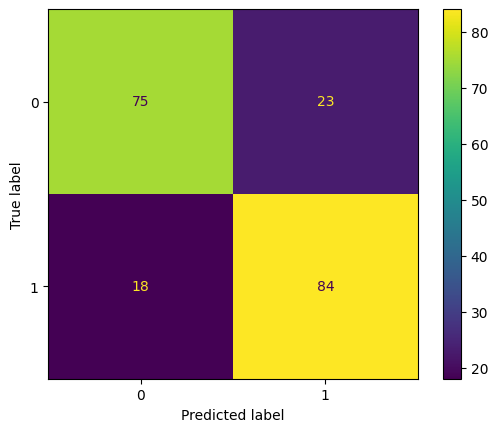

In [40]:
cf=confusion_matrix(ytest,ypred_ts)
cfd= ConfusionMatrixDisplay(cf)
cfd.plot()

In [45]:
st=input('enter your review ')
stl=st.lower()
strm=remove_punc(stl)     ## we have above a function for removing punctuation
sttf=tf.transform([strm]).toarray()

enter your review very good food


In [46]:
pred=model.predict([sttf])

if pred>0.5:
  print('positive review')
else:
  print('negative review')

1/1 [==============================] - 0s 28ms/step
positive review
